In [1]:
import os

In [8]:
%load_ext autoreload
%autoreload

In [3]:
from pipeline.text_to_image_pipeline import Text2ImagePipeline
import torch

2023-02-25 13:36:06.496720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
torch_device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = Text2ImagePipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipeline.to(torch_device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Text2ImagePipeline {
  "_class_name": "Text2ImagePipeline",
  "_diffusers_version": "0.13.1",
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [7]:
prompt = ["Ragdoll cat on the sofa"]
# prompt = ["Many years ago, there was an Emperor who was so very fond of new clothes that he spent all his money on them. "]

height = 512                        # default height of Stable Diffusion
width = 512                        # default width of Stable Diffusion

num_inference_steps = 20            # Number of denoising steps

guidance_scale = 7.5                # Scale for classifier-free guidance

seed = 2
generator = torch.Generator(device=torch_device)
generator = generator.manual_seed(seed)

batch_size = 1


In [8]:
out = pipeline(prompt=prompt, height=height, width=width,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale,
                generator=generator,
                output_type='numpy')

  0%|          | 0/21 [00:00<?, ?it/s]

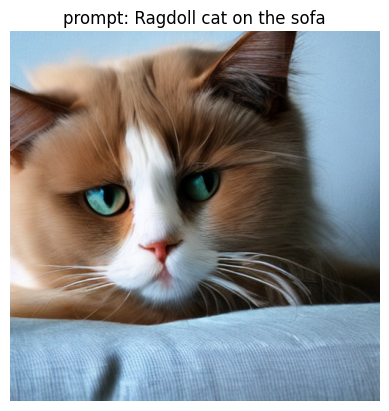

In [9]:


import matplotlib.pyplot as plt 

plt.imshow(out[0])
plt.axis('off')
plt.title(f'prompt: {prompt[0]}')
pass



In [5]:
from pipeline.image_to_image import Image2ImagePipeline
import torch

torch_device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = Image2ImagePipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipeline.to(torch_device)
pass # skip output

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


: 

: 

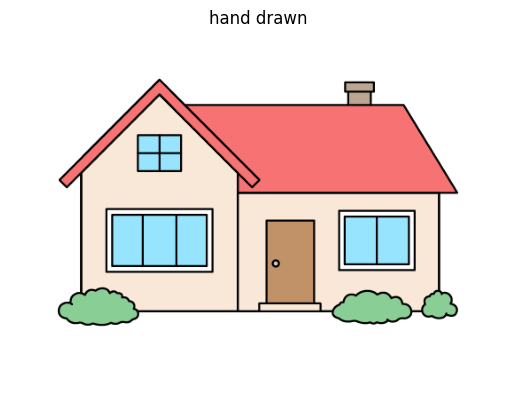

In [2]:
import PIL
import numpy as np
import matplotlib.pyplot as plt 

init_image = PIL.Image.open('data/house_drawing_tutorial.png')
init_image = np.array(init_image)
plt.imshow(init_image)
plt.axis('off')
plt.title(f'hand drawn')
pass



In [3]:
prompt = ["Front of a house, in field of dandelions"]

height = 512                        # default height of Stable Diffusion
width = 512                         # default width of Stable Diffusion

num_inference_steps = 10            # Number of denoising steps
strength = 0.8                      # how much to deviate
guidance_scale = 7.5                # Scale for classifier-free guidance

seed = 32
generator = torch.Generator(device=torch_device)
generator = generator.manual_seed(seed)

batch_size = 1


In [4]:
out = pipeline(prompt=prompt, image=init_image,
                strength = strength,
                height=height, width=width,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale,
                generator=generator,
                output_type='numpy')

UnboundLocalError: local variable 'text_embeddings' referenced before assignment